### Import Data

In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [218]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [219]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Analysis

In [220]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [221]:
#check for any other unusable values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [222]:
len(train[train['Survived'] == 0])

549

In [223]:
len(train['Name'].unique())

891

In [224]:
train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

Some Predictions:
- Sex: Females are more likely to survive.
- SibSp/Parch: People traveling alone are more likely to survive.
- Age: Young children are more likely to survive.
- Pclass: People of higher socioeconomic class are more likely to survive.

###  Data Visualization

#### Sex Feature

C:\Users\ngmin\AppData\Local\Temp\ipykernel_36388\4115836293.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Sex', y = 'Survived', data = train, palette={'male': 'blue', 'female': 'red'})
C:\Users\ngmin\AppData\Local\Temp\ipykernel_36388\4115836293.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Percentage of female who survived:", prob_survived_sex.iloc[0][1]*100)
C:\Users\ngmin\AppData\Local\Temp\ipykernel_36388\4115836293.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by posi

Percentage of female who survived: 74.20382165605095
Percentage of male who survived: 18.890814558058924


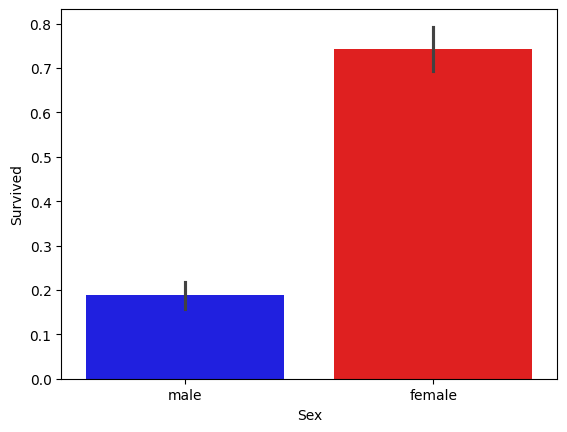

In [225]:
#draw a bar plot of survival by sex
sns.barplot(x = 'Sex', y = 'Survived', data = train, palette={'male': 'blue', 'female': 'red'})

prob_survived_sex = train[['Sex', 'Survived']].groupby(['Sex'], as_index= False).mean().sort_values(['Survived'], ascending= False)
prob_survived_sex

print("Percentage of female who survived:", prob_survived_sex.iloc[0][1]*100)
print("Percentage of male who survived:", prob_survived_sex.iloc[1][1]*100)

As predicted, females have a much higher chance of survival than males. The Sex feature is essential in our predictions.

#### Pclass Feature

C:\Users\ngmin\AppData\Local\Temp\ipykernel_36388\2535884830.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Pclass', y = 'Survived', data = train,  palette= 'Set1')


Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


C:\Users\ngmin\AppData\Local\Temp\ipykernel_36388\2535884830.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Percentage of Pclass = {i+1} who survived:", 100*prob_survived_pclass.iloc[i][1])


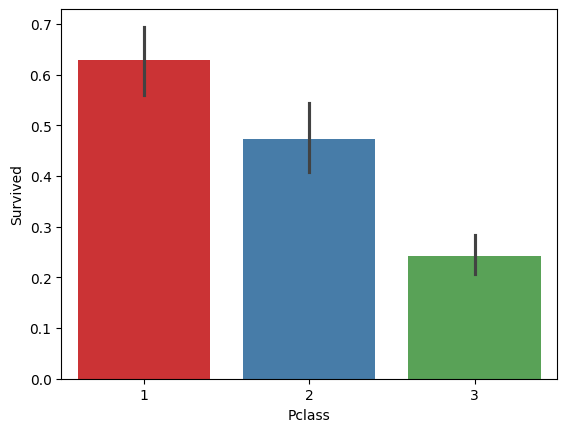

In [226]:
#draw a bar plot of survival by Pclass
sns.barplot(x = 'Pclass', y = 'Survived', data = train,  palette= 'Set1')

prob_survived_pclass = train[['Pclass', 'Survived']].groupby(['Pclass'], as_index= False).mean().sort_values(['Survived'], ascending= False)
prob_survived_pclass

for i in range(len(prob_survived_pclass)):
    print(f"Percentage of Pclass = {i+1} who survived:", 100*prob_survived_pclass.iloc[i][1])

As predicted, people with higher socioeconomic class had a higher rate of survival. (62.9% vs. 47.3% vs. 24.2%)

#### SibSp Feature

C:\Users\ngmin\AppData\Local\Temp\ipykernel_36388\1877269542.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'SibSp', y = 'Survived', data = train, palette='Set2')


Percentage of SibSp = 0.0 who survived: 34.53947368421053
Percentage of SibSp = 1.0 who survived: 53.588516746411486
Percentage of SibSp = 2.0 who survived: 46.42857142857143
Percentage of SibSp = 3.0 who survived: 25.0
Percentage of SibSp = 4.0 who survived: 16.666666666666664
Percentage of SibSp = 5.0 who survived: 0.0
Percentage of SibSp = 8.0 who survived: 0.0


C:\Users\ngmin\AppData\Local\Temp\ipykernel_36388\1877269542.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Percentage of SibSp = {pro_survived_sibsp.iloc[i]['SibSp']} who survived:", 100*pro_survived_sibsp.iloc[i][1])


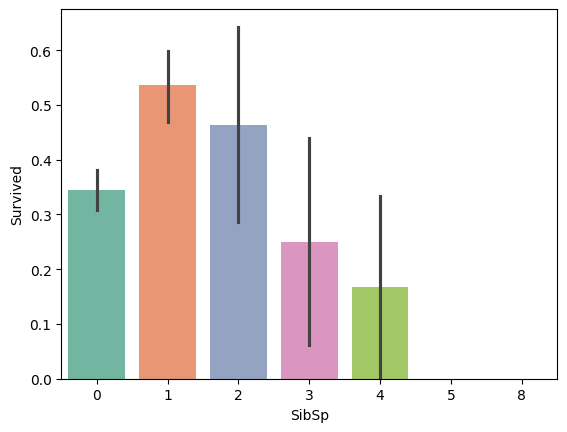

In [227]:
#draw a bar plot of survival by SibSp
sns.barplot(x = 'SibSp', y = 'Survived', data = train, palette='Set2')

pro_survived_sibsp = train[['SibSp', 'Survived']].groupby(['SibSp'], as_index= False).mean().sort_values(['SibSp'], ascending= True)
pro_survived_sibsp

for i in range(len(pro_survived_sibsp)):
    print(f"Percentage of SibSp = {pro_survived_sibsp.iloc[i]['SibSp']} who survived:", 100*pro_survived_sibsp.iloc[i][1])

You can see the plot, it's clear that people with more siblings/spouses were less likely to survive. However, having a special thing that people with no siblings/spouses were less to survive than those with one or two (34.5% vs 53.4% vs 46.4%)

#### Parch Feature

C:\Users\ngmin\AppData\Local\Temp\ipykernel_36388\1622975255.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Parch', y = 'Survived', data = train, palette='Set1')
C:\Users\ngmin\AppData\Local\Temp\ipykernel_36388\1622975255.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Percentage of Parch = {pro_survived_parch.iloc[i]['Parch']} who survived:", 100*pro_survived_parch.iloc[i][1])


Percentage of Parch = 0.0 who survived: 34.365781710914455
Percentage of Parch = 1.0 who survived: 55.08474576271186
Percentage of Parch = 2.0 who survived: 50.0
Percentage of Parch = 3.0 who survived: 60.0
Percentage of Parch = 4.0 who survived: 0.0
Percentage of Parch = 5.0 who survived: 20.0
Percentage of Parch = 6.0 who survived: 0.0


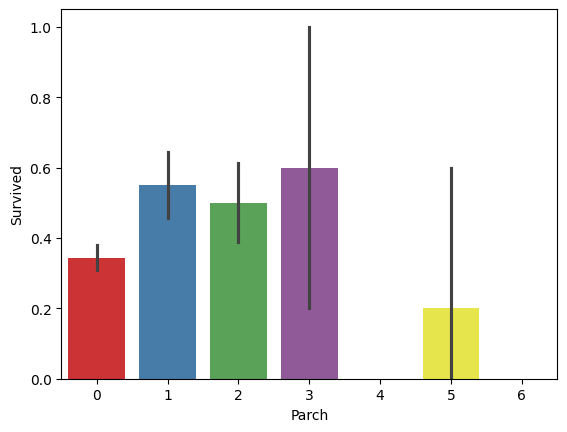

In [228]:
#draw a bar plot of survival by Parch
sns.barplot(x = 'Parch', y = 'Survived', data = train, palette='Set1')

pro_survived_parch = train[['Parch', 'Survived']].groupby(['Parch'], as_index= False).mean().sort_values(['Parch'], ascending= True)
pro_survived_parch

for i in range(len(pro_survived_parch)):
    print(f"Percentage of Parch = {pro_survived_parch.iloc[i]['Parch']} who survived:", 100*pro_survived_parch.iloc[i][1])

People with less than four parents/children are more likely to survive than those with four or more. Again, people traveling alone are less likely to survive than those with 1-3 parents or children

#### Age Feature

C:\Users\ngmin\AppData\Local\Temp\ipykernel_36388\3781768943.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'AgeGroup', y = 'Survived', data= train, palette= 'Set1')


<Axes: xlabel='AgeGroup', ylabel='Survived'>

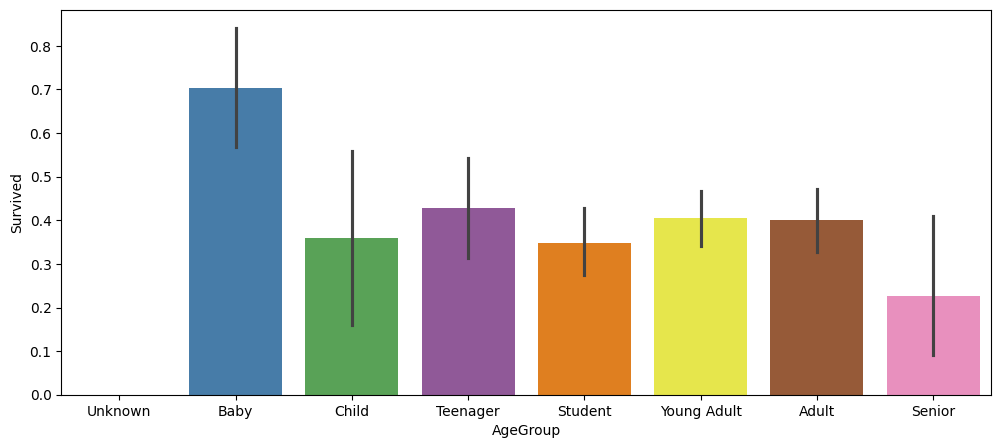

In [229]:
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train['Age'], bins, labels= labels)
test['AgeGroup'] = pd.cut(test['Age'], bins, labels= labels)

#draw a bar plot of survival by AgeGroup above
plt.figure(figsize=(12,5))
sns.barplot(x = 'AgeGroup', y = 'Survived', data= train, palette= 'Set1')

You can see the plot, the percentage of baby is more likely to survive than any other remaining age group

#### Carbin Feature

In [230]:
train['CabinBool'] = train['Cabin'].notnull().astype(int)
test['CabinBool'] = test['Cabin'].notnull().astype(int)

C:\Users\ngmin\AppData\Local\Temp\ipykernel_36388\4158780.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'CabinBool', y = 'Survived', data = train, palette= 'Set1')
C:\Users\ngmin\AppData\Local\Temp\ipykernel_36388\4158780.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Percentage of CabinBool = {i} who survived:", prob_survived_cabin.iloc[i][1]*100)


Percentage of CabinBool = 0 who survived: 29.985443959243085
Percentage of CabinBool = 1 who survived: 66.66666666666666


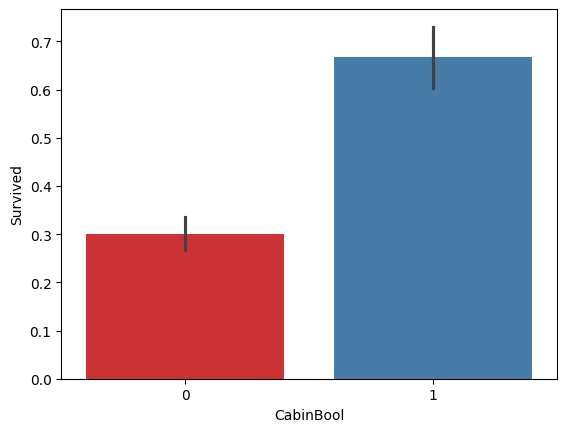

In [231]:
#draw a bar plot of survival by CabinBool after featuring
sns.barplot(x = 'CabinBool', y = 'Survived', data = train, palette= 'Set1')

prob_survived_cabin = train[['CabinBool', 'Survived']].groupby(['CabinBool'], as_index= False).mean().sort_values(['Survived'])
prob_survived_cabin

for i in range(len(prob_survived_cabin)):
    print(f"Percentage of CabinBool = {i} who survived:", prob_survived_cabin.iloc[i][1]*100)

People with a recored Cabin number are more likely to survive than those with no recorded Cabin number

### Cleaning Data

Time to clean our data to account for missing values and unnecessary information!

In [232]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Student,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult,0


In [233]:
train.drop(['Name', 'Ticket', 'Cabin', 'Fare', 'Age'], axis = 1, inplace = True)
test.drop(['Name', 'Ticket', 'Cabin', 'Fare', 'Age'], axis = 1, inplace = True)

In [234]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool
0,1,0,3,male,1,0,S,Student,0
1,2,1,1,female,1,0,C,Adult,1
2,3,1,3,female,0,0,S,Young Adult,0
3,4,1,1,female,1,0,S,Young Adult,1
4,5,0,3,male,0,0,S,Young Adult,0


#### Sex and AgeGroup Feature

In [235]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [236]:
train['Sex'] = le.fit_transform(train['Sex'])
train['AgeGroup'] = le.fit_transform(train['AgeGroup'])

test['Sex'] = le.fit_transform(test['Sex'])
test['AgeGroup'] = le.fit_transform(test['AgeGroup'])

In [237]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool
0,1,0,3,1,1,0,S,4,0
1,2,1,1,0,1,0,C,0,1
2,3,1,3,0,0,0,S,6,0
3,4,1,1,0,1,0,S,6,1
4,5,0,3,1,0,0,S,6,0


#### Embarked Feature

In [238]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [239]:
print("Number of people embarking in Southampton (S):")
southampton = len(train[train["Embarked"] == "S"])
print(southampton)

print("Number of people embarking in Cherbourg (C):")
cherbourg = len(train[train["Embarked"] == "C"])
print(cherbourg)

print("Number of people embarking in Queenstown (Q):")
queenstown = len(train[train["Embarked"] == "Q"])
print(queenstown)

Number of people embarking in Southampton (S):
644
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


It's clear that the majority of people embarked in Southampton (S). Let's go ahead and fill in the missing values with S.

In [240]:
train['Embarked'] = train['Embarked'].fillna('S')
test['Embarked'] = test['Embarked'].fillna('S')

In [241]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
SibSp          0
Parch          0
Embarked       0
AgeGroup       0
CabinBool      0
dtype: int64

In [242]:
train['Embarked'] = le.fit_transform(train['Embarked'])
test['Embarked'] = le.fit_transform(test['Embarked'])

In [243]:
train['Embarked'].unique()

array([2, 0, 1])

In [244]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool
0,1,0,3,1,1,0,2,4,0
1,2,1,1,0,1,0,0,0,1
2,3,1,3,0,0,0,2,6,0
3,4,1,1,0,1,0,2,6,1
4,5,0,3,1,0,0,2,6,0
5,6,0,3,1,0,0,1,7,0
6,7,0,1,1,0,0,2,0,1
7,8,0,3,1,3,1,2,1,0
8,9,1,3,0,0,2,2,6,0
9,10,1,2,0,1,0,0,5,0


### Build Model to choose the best model

In [245]:
X = train.drop(['PassengerId', 'Survived'], axis = 1)
y = train['Survived']

In [246]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [247]:
len(X_train)

712

In [248]:
len(X_test)

179

In [249]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
nb_score = round(accuracy_score(y_pred, y_test)*100, 2)
print("Accuracy of Naive Bayes model:", 100*accuracy_score(y_pred, y_test))

Accuracy of Naive Bayes model: 77.6536312849162


In [250]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
lr_score = round(accuracy_score(y_pred, y_test)*100, 2)
print("Accuracy of Logistic Regression model:", 100*accuracy_score(y_pred, y_test))

Accuracy of Logistic Regression model: 82.68156424581005


In [251]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
svm_score = round(accuracy_score(y_pred, y_test)*100, 2)
print("Accuracy of SVM model:", 100*accuracy_score(y_pred, y_test))

Accuracy of SVM model: 83.24022346368714


In [252]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

dsc = DecisionTreeClassifier()
dsc.fit(X_train, y_train)
y_pred = dsc.predict(X_test)
dsc_score = round(accuracy_score(y_pred, y_test)*100, 2)
print("Accuracy of Decision Tree Classifier model:", 100*accuracy_score(y_pred, y_test))

Accuracy of Decision Tree Classifier model: 81.00558659217877


In [253]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf_score = round(accuracy_score(y_pred, y_test)*100, 2)
print("Accuracy of Random Forest Classifier model:", 100*accuracy_score(y_pred, y_test))

Accuracy of Random Forest Classifier model: 79.88826815642457


In [254]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Decision Tree'],
    'Score': [svm_score, lr_score, rf_score, nb_score, dsc_score]})

models.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,83.24
1,Logistic Regression,82.68
4,Decision Tree,81.01
2,Random Forest,79.89
3,Naive Bayes,77.65


You can see the accuracy of those models above, and finally I can tell you that Random Forest Classifier is the best model for the titanic dataset

In [256]:
#set ids as PassengerId and predict survival 
ids = test['PassengerId']
predictions = rf.predict(test.drop('PassengerId', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('result.csv', index=False)

In [257]:
df = pd.read_csv('result.csv')
df.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0
